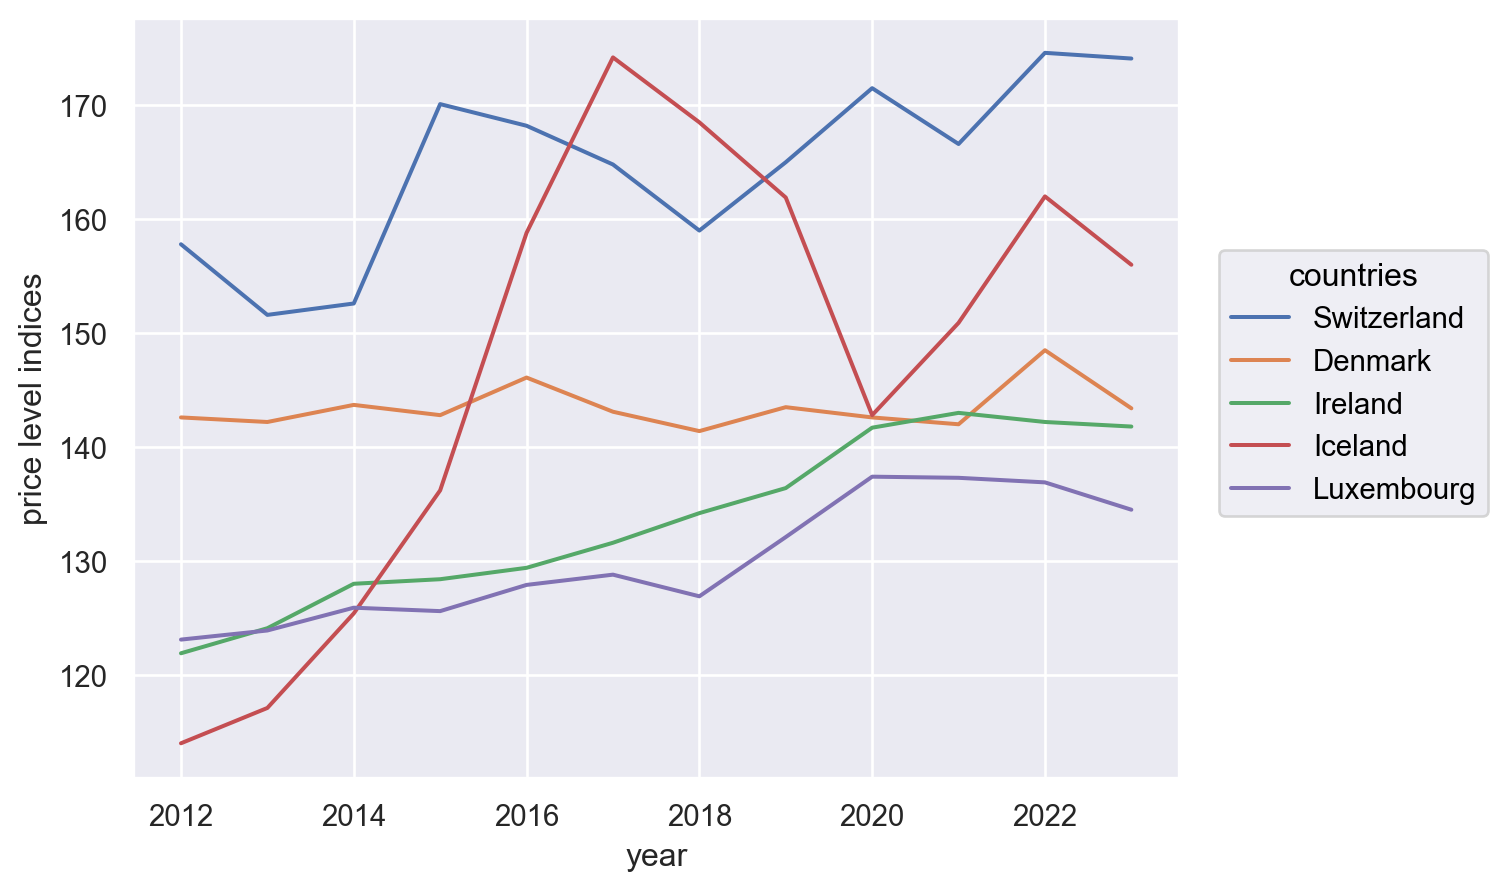

In [107]:
import pandas as pd
import seaborn as sns
import seaborn.objects as so
import numpy as np


dfTsv = pd.read_csv("C:\data analysis best country in europe\costOfLiving\costOfLiving.tsv", sep='\t')

dfTsv.head()

dfTsvLeft = dfTsv.iloc[:, 0].str.split(',', expand=True)
dfTsvLeft.columns = dfTsv.columns[0].split(',')

dfTsv.drop(dfTsv.columns[[0]], axis=1, inplace=True)

dfMerged = pd.concat([dfTsvLeft, dfTsv], axis=1)

dfMerged.rename(columns={dfMerged.columns[3]: 'geo'}, inplace=True)

dfMerged.drop(dfMerged.columns[[0,1,2]], axis=1, inplace=True)

countries = {
    "EU27_2020": "European Union - 27 countries (from 2020)",
    "EA20": "Euro area – 20 countries (from 2023)",
    "EA19": "Euro area - 19 countries  (2015-2022)",
    "BE": "Belgium",
    "BG": "Bulgaria",
    "CZ": "Czechia",
    "DK": "Denmark",
    "DE": "Germany",
    "EE": "Estonia",
    "IE": "Ireland",
    "EL": "Greece",
    "ES": "Spain",
    "FR": "France",
    "HR": "Croatia",
    "IT": "Italy",
    "CY": "Cyprus",
    "LV": "Latvia",
    "LT": "Lithuania",
    "LU": "Luxembourg",
    "HU": "Hungary",
    "MT": "Malta",
    "NL": "Netherlands",
    "AT": "Austria",
    "PL": "Poland",
    "PT": "Portugal",
    "RO": "Romania",
    "SI": "Slovenia",
    "SK": "Slovakia",
    "FI": "Finland",
    "SE": "Sweden",
    "IS": "Iceland",
    "LI": "Liechtenstein",
    "NO": "Norway",
    "CH": "Switzerland",
    "UK": "United Kingdom",
    "BA": "Bosnia and Herzegovina",
    "ME": "Montenegro",
    "MK": "North Macedonia",
    "AL": "Albania",
    "RS": "Serbia",
    "TR": "Türkiye",
    "XK": "Kosovo*",
    "US": "United States",
    "JP": "Japan"
}

dfMerged.replace({"geo": countries}, inplace=True)
dfMerged.replace(': ', np.nan, inplace=True)

years = [2012,
         2013,
         2014,
         2015,
         2016,
         2017,
         2018,
         2019,
         2020,
         2021,
         2022,
         2023]

finalDf = pd.DataFrame(columns=['geo', 'price level indices', 'year'])

for year in years:
    subSet = dfMerged.filter(['geo',str(year) + ' '], axis=1)
    subSet['year'] = year
    subSet.rename(columns={subSet.columns[1]: 'price level indices'}, inplace=True)
    finalDf = pd.concat([subSet, finalDf], ignore_index=True)

finalDf = finalDf.astype({'price level indices': float, 'year' : int})

subDf = finalDf[finalDf['year'] == 2023].sort_values(by=['price level indices'], ascending=False).head(5)
top5Countries  = subDf['geo'].unique()

top5Df = finalDf[finalDf['geo'].isin(top5Countries)]

sns.set_palette("bright")

so.Plot(top5Df, y = "price level indices", x = "year", color="geo").add(so.Line()).label(color="countries")




In [ ]:
graph.label(title = "Top 10 number of employed migrants in EU countries by Citizenship",y="Country", x="Empoyed migrants in millions", color="Citizenship").layout(size=(20, 10))